In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.io import imshow, imread
from skimage.transform import downscale_local_mean
from skimage import img_as_uint
from skimage.transform import resize

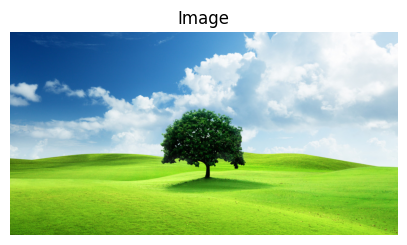

In [ ]:
image = imread('tree.jpg')
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.title("Image")
plt.axis('off')
plt.show()

In [ ]:
#donwsampling
def resample_image(image_path, factor=2, method='nearest'):
  img=imread(image_path)
  if method=='nearest':
    interpolation_order=0
  elif method=='bilinear':
    interpolation_order=1
  downsampled_image=resize(img,(img.shape[0]//factor,img.shape[1]//factor),anti_aliasing=True,order=interpolation_order)
  return downsampled_image

In [ ]:
def demonstrate_resampling(image_path, factors=[2,4], methods=['nearest','bilinear']):
  original_image=imread(image_path)
  factors=[2,4]
  methods=['nearest','bilinear']
  fig,axes=plt.subplots(2,3,figsize=(10,6))
  axes[0,0].imshow(original_image)
  axes[0,0].set_title('Original')
  for i,factor in enumerate(factors):
    for j,method in enumerate(methods):
      downsampled_image=resample_image(image_path,factor=factor,method=method)
      axes[i,j+1].imshow(downsampled_image)
      axes[i,j+1].set_title(f'{method.capitalize()} {factor}x')
  plt.tight_layout()
  plt.show()

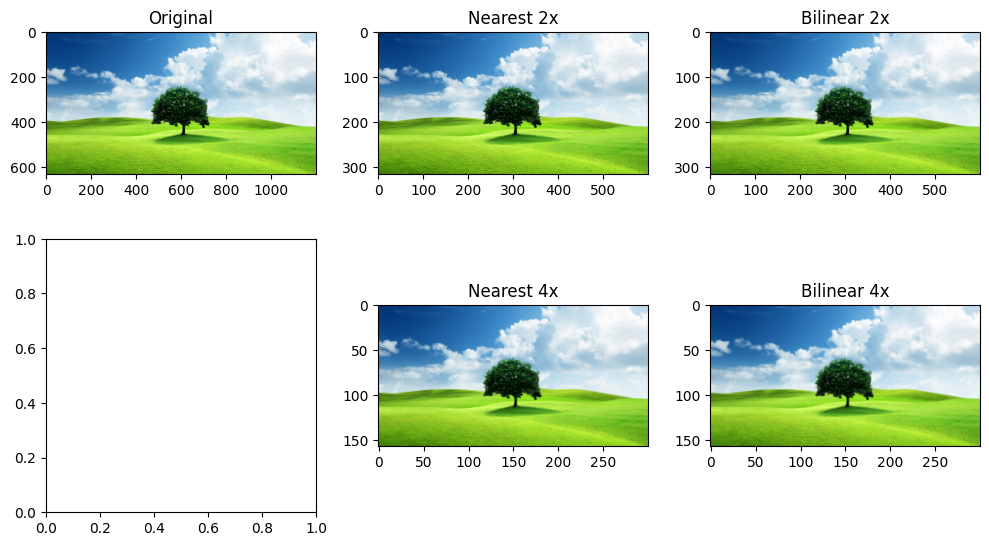

In [ ]:
image_path='tree.jpg'
demonstrate_resampling(image_path, factors=[2,4], methods=['nearest','bilinear'])

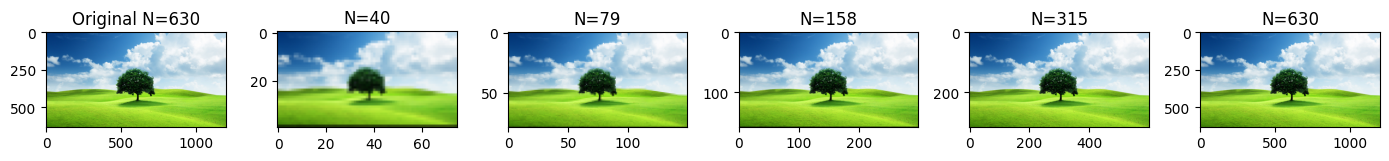

In [ ]:
#downsampling method3- by downscale_local_mean
def downsample_image(image_path, factor=2):
    img=imread(image_path)
    factors=factor**np.arange(0,5)
    fig,ax=plt.subplots(1,len(factors)+1,figsize=(14,4))
    ax[0].imshow(img)
    ax[0].set_title(r'Original N=%d' % img.shape[0])
    for i, factor in enumerate(factors):
        image=downscale_local_mean(img,factors=(factor,factor,1)).astype(int)
        ax_num=len(factors)-i
        ax[ax_num].imshow(image)
        ax[ax_num].set_title(r'N=%d' % image.shape[0])
    plt.tight_layout()
    plt.show()
downsample_image('tree.jpg')

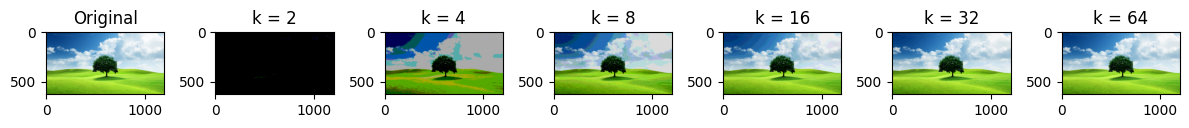

In [ ]:
def quantize_image(image_path, k_values):
    img=imread(image_path)
    fig, ax=plt.subplots(1, len(k_values)+1, figsize=(12, 4))
    ax[0].imshow(img)
    ax[0].set_title('Original')
    for i, k in enumerate(k_values):
        bins=np.linspace(0, img.max(), k)
        quantized_image=np.digitize(img, bins)
        reconstructed_image=(np.vectorize(bins.tolist().__getitem__)(quantized_image-1).astype(int))
        ax[i+1].imshow(reconstructed_image)
        ax[i+1].set_title(r'k = %d' % k)
    plt.tight_layout()
    plt.show()
k_values = [ 2,  4,  8, 16, 32, 64]
quantize_image('tree.jpg', k_values)